## Практические задания 

### Задание 1 

Посмотреть документацию к API GitHub, разобраться как вывести список репозиториев для конкретного пользователя, сохранить JSON-вывод в файле *.json.

#### Подключение библиотек и скриптов 

In [118]:
import requests as rq
import pandas as pd
import json
import matplotlib.pyplot as plt
from pprint import pprint as ppr

**Вспомогательные функции**

In [119]:
def get_repositories(username = 'Mr-Shults', type = 'all'
                     , sort = 'created', direction = 'asc'):
    
    API_URL = 'https://api.github.com'
    API_URL_REPOS = '/users/' + username + '/repos'
    
    header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'}
    appid = '00b4b952bb4b1cf8ce44a41040be4656cd530647'
    
    params = {'Authorization': 'token ' + appid
              , 'type': type, 'sort': sort, 'direction': direction}
    
    #Для данной задачи это не нужно, но в качестве тренировки...
    #Авторизация по словам документации:
    #curl -H "Authorization: token OAUTH-TOKEN" https://api.github.com
    
    resp = rq.get(API_URL + API_URL_REPOS, params)

    data = []
    
    if resp.ok:
        data = json.loads(resp.text)
    else:
        print('Connection error: ', resp.text)
        
    return data
    

**Основной алгоритм**

In [120]:
data = get_repositories(username = 'apache', direction = 'desk') #изменим только пользователя и сортировку по умолчанию

In [121]:
df = pd.DataFrame(data)

In [122]:
df['repo_name'] = df['html_url'].apply(lambda x: x.split('/')[-1])

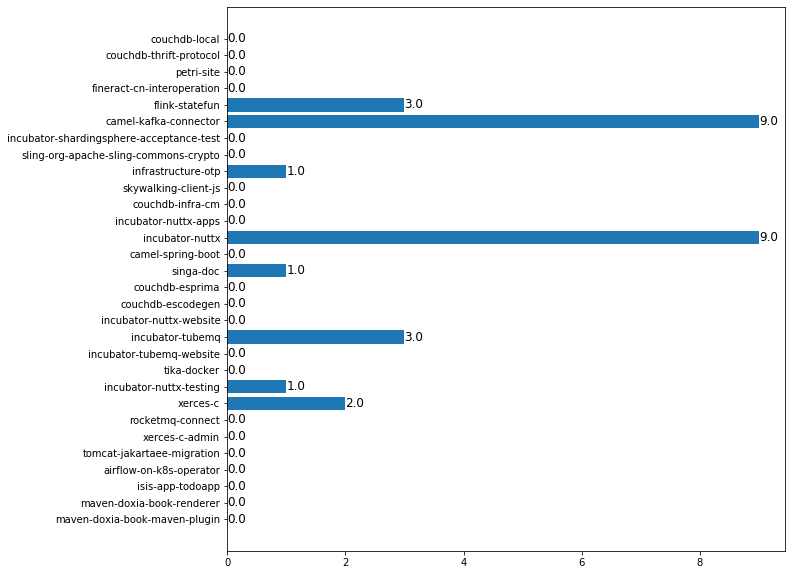

In [123]:
plt.figure(figsize = (10, 10))
plt.barh(df['repo_name'], df['open_issues'])

for i, val in enumerate(df['open_issues'].values):
    plt.text(val, i, float(val), horizontalalignment = 'left'
             , verticalalignment = 'center', fontdict = {'fontweight':500, 'size':12})

**Результат**

In [124]:
#сохраним JSON результат в файл *.json

with open('git_repos.json', 'w', encoding = 'utf-8') as f:
    json.dump(data, f, ensure_ascii = False, indent = 4)

### Задание 2 

Изучить список открытых API. Найти среди них любое, требующее авторизацию (любого типа). Выполнить запросы к нему, пройдя авторизацию. Ответ сервера записать в файл.

#### Выбор API

https://api.nasa.gov/neo/rest/v1/feed
NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the NASA JPL Asteroid team (http://neo.jpl.nasa.gov/).

#### Подключение библиотек и скриптов 

In [301]:
import requests as rq
import pandas as pd
import json
import matplotlib.pyplot as plt
from pprint import pprint as ppr

In [302]:
API_URL = 'https://api.nasa.gov/neo/rest/v1/'
API_FNC = 'neo/browse'
API_KEY = 'XtxSQJSJhVeS5Iyb7orqAd2n9lnwHAJFFe9uOM3p'

**Вспомогательные функции**

In [303]:
def get_asteroids_info():
    
    params = {'api_key': API_KEY}
    
    resp = rq.get(API_URL + API_FNC, params)
    
    t_data = json.loads(resp.text)
    j_data = json.loads(resp.text)
    
    next_link = j_data['links']['next']
    
    lst = t_data['near_earth_objects']
    
    i=1
    
    while next_link != '' and i < 10:
    
        i= i+1
        
        resp = rq.get(next_link)
        j_data = json.loads(resp.text)
        
        lst.extend(j_data['near_earth_objects'])
        
        next_link = j_data['links']['next']
    
    return lst

**Основной алгоритм**

In [304]:
aster_data = get_asteroids_info()

In [305]:
df = pd.DataFrame(aster_data)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
links                                200 non-null object
id                                   200 non-null object
neo_reference_id                     200 non-null object
name                                 200 non-null object
designation                          196 non-null object
nasa_jpl_url                         200 non-null object
absolute_magnitude_h                 199 non-null float64
estimated_diameter                   199 non-null object
is_potentially_hazardous_asteroid    200 non-null bool
close_approach_data                  200 non-null object
orbital_data                         200 non-null object
is_sentry_object                     200 non-null bool
name_limited                         1 non-null object
sentry_data                          12 non-null object
dtypes: bool(2), float64(1), object(11)
memory usage: 19.3+ KB


**Результат**

In [307]:
#сохраним JSON результат в файл *.json

with open('asteroid_repos.json', 'w', encoding = 'utf-8') as f:
    json.dump(aster_data, f, ensure_ascii = False, indent = 4)